In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [16]:
csv_path = "/Users/corneliamason/Downloads/all_data.csv"
df = pd.read_csv(csv_path, low_memory=False)

df.head()

,tweet_id,Compound_Score,Positive_Score,Negative_Score,Neutral_Score,external_author_id,author,content,region,language,...,account_type,retweet,account_category,new_june_2018,alt_external_id,article_url,tco1_step1,tco2_step1,tco3_step1,new_publish_date
0,914580356430536707,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,2017-10-01 19:58:00
1,914621840496189440,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,2017-10-01 22:43:00
2,914623490375979008,-0.1531,0.126,0.198,0.676,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,...,Right,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,2017-10-01 22:50:00
3,914639143690555392,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,2017-10-01 23:52:00
4,914312219952861184,0.6399,0.413,0.000,0.587,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,...,Right,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,2017-10-01 02:13:00


In [7]:
#Group by region
region_category = df.groupby(["region"]).mean()["Compound_Score"]
region_category.head()

region
Azerbaijan    0.150028
Belarus       0.047756
Canada        0.123821
Denmark       0.440400
Egypt         0.112000
Name: Compound_Score, dtype: float64

In [8]:
#Group by Retweet 
retweet_category = df.groupby(["retweet"]).mean()["Compound_Score"]
retweet_category.head()

retweet
0   -0.069193
1    0.008679
Name: Compound_Score, dtype: float64

In [95]:
df_region_summary = pd.DataFrame({"Avg Compound": retweet_category})
df_region_summary.head(30)

,Avg Compound
retweet,
0,-0.069193
1,0.008679


In [93]:
df_region_summary = pd.DataFrame({"Avg Compound": region_category})
df_region_summary.head(30)

,Avg Compound
region,
Azerbaijan,0.150028
Belarus,0.047756
Canada,0.123821
Denmark,0.440400
Egypt,0.112000
France,0.000000
Germany,-0.114282
Iraq,-0.238482
Israel,-0.021664


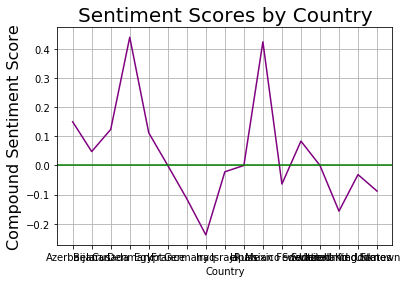

In [91]:
# Convert the regions and sentiment dataframes into lists to allow for graphing.
region_list = df_region_summary.index.tolist()
avg_com_list = df_region_summary["Avg Compound"]

# Plot the average compound sentiments with region list and Average Compound Score
[avg_compound_line] = plt.plot(region_list, avg_com_list, color="purple", label="Average Compound Score")

# Set graph parameters, including title, axes labels, red line on y=0, and a grid over the graph.
plt.title("Sentiment Scores by Country", fontsize=20)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Compound Sentiment Score', fontsize=16)
plt.axhline(color="green")
plt.grid()

#show the final graph.
region_list = df_region_summary.index.tolist()
avg_com_list = df_region_summary["Avg Compound"]plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c03644a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0364400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0262cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf450cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07bed30>],
 'means': []}

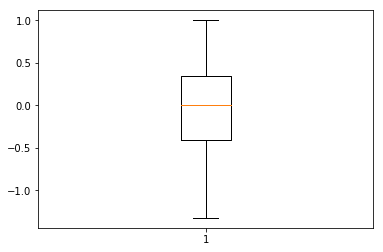

In [122]:
region_list = df_region_summary.index.tolist()
avg_com_list = df_region_summary["Avg Compound"]

# Plug data into boxplot
spread = avg_com_list
center = region_list
flier_high = np.random.rand(10) * 1.5
flier_low = np.random.rand(10) * -1.5
data = np.concatenate((spread, center, flier_high, flier_low), 0)

# basic plot
plt.boxplot(data)

In [118]:
n_groups = 17
means_men = (0.150028, 0.047756, 0.123821, 0.440400, 0.112000, 0.000000, -0.114282, -0.238482, -0.021664, 0.000000, 0.424476, -0.063671, 0.083687, 0.000000, -0.156881, -0.031307, -0.087975)
std_men = (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,)


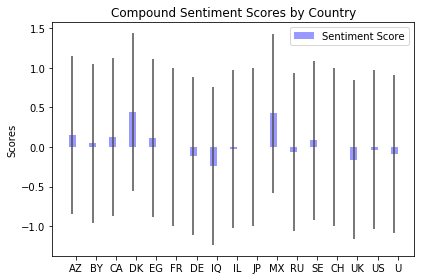

In [110]:
#Use plot bar graph
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Sentiment Score')


plt.xlabel('')
plt.ylabel('Scores')
plt.title('Compound Sentiment Scores by Country')
plt.xticks(index + bar_width / 2, ('AZ', 'BY', 'CA', 'DK', 'EG', 'FR', 'DE','IQ', 'IL','JP', 'MX','RU','SE','CH','UK','US','U' ))
plt.legend()

plt.tight_layout()
plt.show()